In [50]:
import os
import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
from pathlib import Path

from tqdm.auto import tqdm

import matplotlib.pyplot as plt

import utils

seed = 1234
np.random.seed(seed)

tf.__version__

'2.1.0'

In [17]:
input_signature = 'serving_default'
output_signature = 'embeddings'
embedding_size = 512
batch_size = 256

model_path = '/home/peeranat_absoroute_io/trained_models/exports/arcface_resnet34'

lfw_n_folds = 10
lfw_pairs = '/mnt/disks/data/sirius/datasets/lfw-deepfunneled_mtcnnpy_112_margin32/pairs.txt'
lfw_dir = Path('/mnt/disks/data/sirius/datasets/lfw-deepfunneled_mtcnnpy_112_margin32')

asr_dir = Path('/mnt/disks/data/sirius/datasets/asr_dataset_mtcnnpy_112_margin32')


In [5]:
def preprocess(path):
    rgb = utils.read_rgb(path)
    img = (rgb - 127.5) * 0.0078125
    return img


def pred_batch_fn(inputs):
    preprocessed = tf.cast([preprocess(path) for path in inputs], tf.float32)
    return pred_fn(preprocessed)[output_signature]

In [4]:
model = tf.saved_model.load(model_path)
pred_fn = model.signatures[input_signature]

In [ ]:
candidates = []

In [40]:
np.random.randint(0, 10)

5

In [42]:
os.listdir('/mnt/disks/data/sirius/datasets/asr_dataset_mtcnnpy_112_margin32/Ad_Carabao')

['0.png', '1.png']

In [53]:
def select_candidates(path):
    selected = []
    for p in path.glob('*'):
        if not p.is_file():
            
            files = list(p.glob('*'))
            n = np.random.randint(0, len(files))
            selected.append(files[n])
    
    np.random.shuffle(selected)
    return selected
            

In [83]:
pairs1 = select_candidates(asr_dir)
len(pairs1)

60

In [84]:
registered = {item.parent.name: item.name for item in pairs1}
registered

{'Coco': '0.png',
 'Aun_son': '1.png',
 'Pancake': '0.png',
 'Bella': '1.png',
 'Prayut_Chan-o-cha': '1.png',
 'Sunny': '1.png',
 'Jiso_Blackpink': '0.png',
 'Ritchie': '0.png',
 'Kimberly': '0.png',
 'Ad_Carabao': '0.png',
 'Ter': '0.png',
 'Champ': '0.png',
 'Jameji': '0.png',
 'Yaya': '1.png',
 'Sek_Loso': '0.png',
 'Tim_Pita': '0.png',
 'Clara_Lee': '0.png',
 'Tae_bro': '1.png',
 'Thaksin': '0.png',
 'Anutin': '0.png',
 'Mao_Buyi': '1.png',
 'Mai_Davika': '1.png',
 'Woonsen': '1.png',
 'Chor': '1.png',
 'Ananda': '1.png',
 'Ken_Theeradet': '0.png',
 'Aun': '5.png',
 'Chakrit': '1.png',
 'Pom_Pravit': '1.png',
 'Tae': '1.png',
 'Aum_Patcharapa': '0.png',
 'Jane_Zhang': '1.png',
 'Nancy_Momoland': '1.png',
 'Yoshi': '4.png',
 'Woodie': '1.png',
 'Thanatorn': '1.png',
 'Cheer_Thikamporn': '1.png',
 'Suthep': '0.png',
 'Yingluck': '1.png',
 'Wier': '0.png',
 'Ood_Pentor': '0.png',
 'Lisa_Blackpink': '0.png',
 'Nadej': '0.png',
 'Dilraba_Dilmurat': '1.png',
 'Kim_Hee_Sun': '0.png',
 'Ma

In [86]:
def predict_embeddings(images):
    n_images = len(images)
    embs_array = np.zeros((n_images, embedding_size))

    it = tqdm(range(0, n_images, batch_size), 'Predict face embeddings')
    for start in it:
        end = start + batch_size
        embs_array[start:end] = pred_batch_fn(images[start:end])
        
    return embs_array

In [87]:
pairs1_embs = predict_embeddings(pairs1)

In [88]:
pairs1_embs

array([[ 0.00943056, -0.01117769, -0.12749901, ..., -0.01811651,
        -0.0301436 ,  0.0583836 ],
       [-0.02183944,  0.00440063, -0.01023856, ...,  0.03284971,
         0.053158  ,  0.01166619],
       [-0.04462344, -0.02889526, -0.03491368, ...,  0.07495308,
        -0.038265  , -0.10092377],
       ...,
       [-0.05544491,  0.00418517, -0.00195389, ..., -0.02630049,
        -0.02006575, -0.02843592],
       [-0.07489423,  0.06859683,  0.00205639, ..., -0.00763002,
         0.03115678, -0.00882565],
       [ 0.0313982 , -0.01633876,  0.10467181, ...,  0.09235974,
        -0.0898608 , -0.07092799]])

In [89]:
threshold = 1.57

In [108]:
pairs1[:10]

[PosixPath('/mnt/disks/data/sirius/datasets/asr_dataset_mtcnnpy_112_margin32/Coco/0.png'),
 PosixPath('/mnt/disks/data/sirius/datasets/asr_dataset_mtcnnpy_112_margin32/Aun_son/1.png'),
 PosixPath('/mnt/disks/data/sirius/datasets/asr_dataset_mtcnnpy_112_margin32/Pancake/0.png'),
 PosixPath('/mnt/disks/data/sirius/datasets/asr_dataset_mtcnnpy_112_margin32/Bella/1.png'),
 PosixPath('/mnt/disks/data/sirius/datasets/asr_dataset_mtcnnpy_112_margin32/Prayut_Chan-o-cha/1.png'),
 PosixPath('/mnt/disks/data/sirius/datasets/asr_dataset_mtcnnpy_112_margin32/Sunny/1.png'),
 PosixPath('/mnt/disks/data/sirius/datasets/asr_dataset_mtcnnpy_112_margin32/Jiso_Blackpink/0.png'),
 PosixPath('/mnt/disks/data/sirius/datasets/asr_dataset_mtcnnpy_112_margin32/Ritchie/0.png'),
 PosixPath('/mnt/disks/data/sirius/datasets/asr_dataset_mtcnnpy_112_margin32/Kimberly/0.png'),
 PosixPath('/mnt/disks/data/sirius/datasets/asr_dataset_mtcnnpy_112_margin32/Ad_Carabao/0.png')]

In [109]:

def select_pairs2(pairs1):
    selected = []
    for p in pairs1:
        parent = p.parent
        items = [item for item in p.parent.glob('*') if p.name != item.name]
        n = np.random.randint(0, len(items))
        item = items[n]
        selected.append(item)

    return selected

def distance(embeddings1, embeddings2):
    diff = np.subtract(embeddings1, embeddings2)
    dist = np.sum(np.square(diff), 1)
    return dist

In [110]:
pairs2 = select_pairs2(pairs1)

In [112]:
len(pairs2)

60

In [113]:
pairs2_embs = predict_embeddings(pairs2)
pairs2_embs

array([[ 0.04441927, -0.02061996, -0.10523365, ..., -0.0042569 ,
        -0.04274129, -0.01048723],
       [ 0.03643235,  0.03884813, -0.03063776, ..., -0.00361592,
         0.01881082,  0.02707511],
       [-0.10050879, -0.02270074,  0.00972277, ...,  0.09056913,
        -0.01510516, -0.0004803 ],
       ...,
       [ 0.00634567,  0.0142382 ,  0.01422369, ..., -0.01947108,
         0.04068901, -0.02314746],
       [-0.02446369,  0.05635517, -0.02580905, ...,  0.00668326,
         0.01751931, -0.02097135],
       [ 0.02312256, -0.0374101 , -0.00774236, ...,  0.05085433,
        -0.07977555, -0.0534717 ]])

In [131]:
matched = []
for idx1, emb1 in enumerate(pairs1_embs):
#     for idx2, embs in enumerate(pairs2_embs):
    dist = distance(emb1, pairs2_embs)
    matched.append(dist.argmin() == idx1)
    

In [134]:
matched

[True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [133]:
np.sum(matched)

59

In [125]:
distance(pairs1_embs[2], pairs2_embs)

array([1.91989251, 2.14449999, 0.87750076, 1.80008622, 2.15977871,
       1.93993433, 2.13139818, 1.78004415, 1.79794229, 1.9238019 ,
       1.94761007, 1.9089888 , 2.05921476, 2.03335028, 2.00154688,
       2.07762245, 1.93749091, 1.84890951, 1.91270463, 1.99596408,
       2.04549499, 1.77952282, 1.70075936, 2.06063874, 1.95895751,
       1.90290709, 2.20677215, 1.81184683, 2.11728134, 1.85771665,
       1.85575776, 2.41456422, 1.71818748, 1.83167828, 1.84977871,
       1.83332236, 1.74406547, 1.98425405, 1.68166176, 1.86604294,
       1.91626282, 2.0937721 , 1.85571229, 1.95738786, 2.18661373,
       2.10531545, 1.9855119 , 2.0247116 , 1.96589475, 1.83411858,
       2.06622056, 1.98831257, 2.14225923, 1.68785462, 2.17921454,
       1.9806783 , 1.82493602, 1.90025367, 2.12829066, 2.0961077 ])

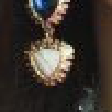

In [135]:
Image.open(pairs1[6])

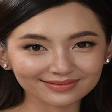

In [129]:
Image.open(pairs2[3])

In [122]:
distance(pairs1_embs[1], pairs2_embs).argmin()

1